# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [14]:
dataset = pd.read_csv('pokemon.csv', sep=',')

In [3]:
shape = dataset.shape
print("Total de Linhas e Colunas: ", shape)
sumario = dataset.describe()
print("Informações estatisticas do Dataset: ")
print(sumario)

Total de Linhas e Colunas:  (801, 41)
Informações estatisticas do Dataset: 
       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250

AxesSubplot(0.125,0.125;0.775x0.755)
Histograma com a distibuicao da classe Is Legendary


Text(0, 0.5, 'Frequencia')

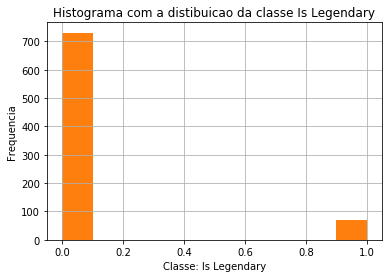

In [4]:
print(dataset.is_legendary.hist())
print("Histograma com a distibuicao da classe Is Legendary")
dataset.is_legendary.hist()
plt.title('Histograma com a distibuicao da classe Is Legendary')
plt.xlabel('Classe: Is Legendary')
plt.ylabel('Frequencia')

## Selecionando os dados iniciais

In [17]:
data = dataset.drop(['is_legendary'], axis=1)
data = data.drop(['name','japanese_name','pokedex_number','percentage_male','type2',
                  'classfication','abilities','generation','base_happiness'], axis=1)

labels = dataset['is_legendary']

In [18]:
print(data.shape)

(801, 31)


# Primeiro treinamento

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   labels,
                                                   test_size=0.3,
                                                   random_state=42)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)

ValueError: could not convert string to float: 'grass'

## Normalizando labels

In [21]:
from sklearn.preprocessing import LabelEncoder

In [23]:
#categorical boolean mask
categorical_feature_mask = data.dtypes==object
#filter categorical columns using mask and convert to list
categorical_cols = data.columns[categorical_feature_mask].tolist()

#encode labels for column list
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

ValueError: Must have equal len keys and value when setting with an iterable

In [24]:
print(data['type1'])

0       9
1       9
2       9
3       6
4       6
5       6
6      17
7      17
8      17
9       0
10      0
11      0
12      0
13      0
14      0
15     12
16     12
17     12
18     12
19     12
20     12
21     12
22     13
23     13
24      3
25      3
26     10
27     10
28     13
29     13
       ..
771    12
772    12
773    15
774    12
775     6
776     3
777     8
778    17
779    12
780     8
781     2
782     2
783     2
784     3
785    14
786     9
787    17
788    14
789    14
790    14
791    14
792    15
793     0
794     0
795     3
796    16
797     9
798     1
799    14
800    16
Name: type1, Length: 801, dtype: int32


**Encoded labels**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   labels,
                                                   test_size=0.3,
                                                   random_state=42)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Ajuste de valores**

In [26]:
# Replace using median 
median_height_m = data['height_m'].median()
data['height_m'].fillna(median_height_m, inplace=True)

median_weight_kg = data['weight_kg'].median()
data['weight_kg'].fillna(median_weight_kg, inplace=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   labels,
                                                   test_size=0.3,
                                                   random_state=42)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
print(dataset.iloc[149]['name'])
to_predict = data.iloc[149:150]
#sgd_pred = sgd.predict(to_predict)
#print(sgd_pred)

sgd_pred = sgd.predict(data)
print(sgd_pred)



Mewtwo
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

**Oversampling**

In [32]:
from collections import Counter
from sklearn.utils import resample

In [33]:
def oversampling(x, y, random_state=0):
    cnt = Counter()
    for cat in y:
        cnt[cat] += 1

    classe_majo = cnt.most_common()[0][0]
    num_samples = cnt.most_common()[0][1]

    dados_bal = []
    labels_bal = []
    for classes in np.unique(y):
        if not classes == classe_majo:
            dados = x[y == classes]
            label = y[y == classes]

            sampled_dados, sampled_label = resample(dados, 
                                           label, 
                                           n_samples=num_samples,
                                           random_state=random_state)

            dados_bal.append(sampled_dados)
            labels_bal.append(sampled_label)
        else:
            dados_bal.append(x[y == classe_majo])
            labels_bal.append(y[y == classe_majo])

    return np.vstack(dados_bal), np.hstack(labels_bal)

In [39]:
balanced_data, balanced_labels = oversampling(data,labels,42)

X_train, X_test, y_train, y_test = train_test_split(balanced_data,
                                                   balanced_labels,
                                                   test_size=0.3,
                                                   random_state=42)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
print(dataset.iloc[149]['name'])
to_predict = balanced_data.iloc[1:150]
#pred_res = sgd.predict(to_predict)
#print(pred_res)

sgd_pred = sgd.predict(to_predict)
print(sgd_pred)

Mewtwo


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

## Desempenho

In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [49]:
balanced_data, balanced_labels = oversampling(data,labels,42)

X_train, X_test, y_train, y_test = train_test_split(balanced_data,
                                                   balanced_labels,
                                                   test_size=0.3,
                                                   random_state=42)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)

accuracy = accuracy_score(y_test, sgd_pred)
precision = precision_score(y_test, sgd_pred)
recall = recall_score(y_test, sgd_pred)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))

Accuracy: 0.510250569476082
Precision: 0.0
Recall: 0.0


In [50]:
print(dataset.iloc[149]['name'])
to_predict = data.iloc[149:150]
pred_res = sgd.predict(to_predict)
print(pred_res)

Mewtwo
[0]


## Cross validation

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

In [52]:
kf = KFold(n_splits=10)


balanced_data, balanced_labels = shuffle(balanced_data, balanced_labels, random_state = 42)

In [53]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
scores = cross_val_score(sgd, balanced_data, balanced_labels, cv=10)
print(scores)
y_pred = cross_val_predict(sgd, balanced_data, balanced_labels, cv=10)
conf_matrix = confusion_matrix(balanced_labels,y_pred )
print(conf_matrix)

[0.5        0.5        0.96575342 0.5        0.93150685 0.94520548
 0.5        0.94520548 0.95205479 0.95205479]
[[503 228]
 [242 489]]


In [54]:
curr_fold = 1

for train_index, test_index in kf.split(data):
    X_train, X_test = balanced_data[train_index], balanced_data[test_index]
    y_train, y_test = balanced_labels[train_index], balanced_labels[test_index]
    
    print('Validação Cruzada - Fold {}'.format(curr_fold))
    print('Conjunto de treinamento - Dados {} - {}'.format(X_train.shape, y_train.shape))
    print('Conjunto de teste - Dados {} - {}'.format(X_test.shape, y_test.shape))
    print('____________________________________________________________________________')
    
    sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    sgd.fit(X_train, y_train)

    sgd_pred = sgd.predict(X_test)

    accuracy = accuracy_score(y_test, sgd_pred)
    precision = precision_score(y_test, sgd_pred)
    recall = recall_score(y_test, sgd_pred)

    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))    
    
    curr_fold +=1
    print('############################################################################')

Validação Cruzada - Fold 1
Conjunto de treinamento - Dados (720, 31) - (720,)
Conjunto de teste - Dados (81, 31) - (81,)
____________________________________________________________________________
Accuracy: 0.5308641975308642
Precision: 0.0
Recall: 0.0
############################################################################
Validação Cruzada - Fold 2
Conjunto de treinamento - Dados (721, 31) - (721,)
Conjunto de teste - Dados (80, 31) - (80,)
____________________________________________________________________________
Accuracy: 0.525
Precision: 0.0
Recall: 0.0
############################################################################
Validação Cruzada - Fold 3
Conjunto de treinamento - Dados (721, 31) - (721,)
Conjunto de teste - Dados (80, 31) - (80,)
____________________________________________________________________________
Accuracy: 0.4875
Precision: 0.0
Recall: 0.0
############################################################################
Validação Cruzada - Fold 4
Conju